In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', None)

In [4]:
train = pd.read_csv('./datasets/train.csv', keep_default_na=False,na_values=[''])

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [6]:
#train.isnull().sum().sort_values(ascending=False)

In [2097]:
train.corr()['SalePrice']

Id                -0.051398
PID               -0.255052
MS SubClass       -0.087335
Lot Frontage       0.341842
Lot Area           0.296566
Overall Qual       0.800207
Overall Cond      -0.097019
Year Built         0.571849
Year Remod/Add     0.550370
Mas Vnr Area       0.512230
BsmtFin SF 1       0.423519
BsmtFin SF 2       0.016255
Bsmt Unf SF        0.190210
Total Bsmt SF      0.628925
1st Flr SF         0.618486
2nd Flr SF         0.248452
Low Qual Fin SF   -0.041594
Gr Liv Area        0.697038
Bsmt Full Bath     0.283662
Bsmt Half Bath    -0.045328
Full Bath          0.537969
Half Bath          0.283001
Bedroom AbvGr      0.137067
Kitchen AbvGr     -0.125444
TotRms AbvGrd      0.504014
Fireplaces         0.471093
Garage Yr Blt      0.533922
Garage Cars        0.648220
Garage Area        0.650270
Wood Deck SF       0.326490
Open Porch SF      0.333476
Enclosed Porch    -0.135656
3Ssn Porch         0.048732
Screen Porch       0.134581
Pool Area          0.023106
Misc Val          -0

In [7]:
#sns.pairplot(train,x_vars="SalePrice",corner = True);

# Super Simple Model Practice

In [8]:
#train_sample = train[['Gr Liv Area','Overall Qual','Garage Area','Year Built','BsmtFin SF 1','SalePrice','Full Bath']]

In [9]:
#train_sample.head()

In [10]:
#train_sample.dropna(inplace = True)

In [11]:
#train_sample.describe();

In [12]:
#features = ['Gr Liv Area','Overall Qual','Garage Area','Year Built','BsmtFin SF 1','Full Bath']
#X = train_sample[features]
#y = train_sample['SalePrice']

In [13]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [14]:
#linreg = LinearRegression()

In [15]:
#linreg.fit(X_train,y_train)

In [16]:
#linreg.score(X_train,y_train)

In [17]:
#linreg.score(X_test,y_test)

In [18]:
#train_preds = linreg.predict(X_train)
#test_preds = linreg.predict(X_test)

In [19]:
#def rmse(y_true,y_pred):
#    return mean_squared_error(y_true,y_pred) ** .5

In [20]:
#rmse(y_train, train_preds),rmse(y_test, train_preds)

In [21]:
#plt.scatter(y_test, test_preds)

In [22]:
#resids = train_preds - y_train

In [23]:
#plt.scatter(x = y_train, y = resids)

In [24]:
train.sort_values(by='SalePrice');

# Drop Area

In [25]:
#train.drop(471, inplace = True)

In [26]:
#train.drop(1327, inplace = True)

In [27]:
#train.drop(616, inplace = True)

In [28]:
#train.drop(1712, inplace = True)

In [29]:
#train2 = train

In [30]:
#droped = train2.iloc[[471,1327,616,1327,1712]]

## Test

In [1731]:
test = pd.read_csv('./datasets/test.csv')

In [1522]:
# Switch test and train

In [1732]:
#train = test

In [2026]:
train = pd.read_csv('./datasets/train.csv')

# Base features 

In [1733]:
features = pd.DataFrame()

In [1734]:
features

""


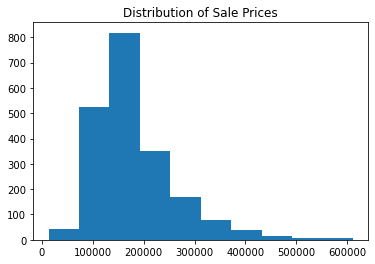

In [2093]:
plt.hist(train['SalePrice'])
plt.title('Distribution of Sale Prices');

In [2094]:
min(train['SalePrice'])

12789

In [2095]:
max(train['SalePrice'])

611657

In [2096]:
train['SalePrice'].mean()

181469.70160897123

### MS SubClass

In [1735]:
train['MS SubClass'].describe()

count    878.000000
mean      58.268793
std       42.235407
min       20.000000
25%       20.000000
50%       50.000000
75%       70.000000
max      190.000000
Name: MS SubClass, dtype: float64

In [1736]:
train['MS SubClass'].astype(str);

In [1737]:
MS_SubClass_dummy = pd.get_dummies(train['MS SubClass'])

In [1738]:
MS_SubClass_dummy.isnull().sum()

20     0
30     0
40     0
45     0
50     0
60     0
70     0
75     0
80     0
85     0
90     0
120    0
160    0
180    0
190    0
dtype: int64

In [1739]:
features = pd.concat([features, MS_SubClass_dummy], axis = 1)

(array([347.,  98., 218.,  59.,  34.,  60.,   0.,   0.,  41.,  21.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

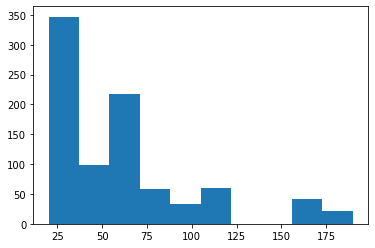

In [1740]:
plt.hist(train['MS SubClass'])

### MS Zoning

In [1741]:
train['MS Zoning'].describe()

count     878
unique      6
top        RL
freq      674
Name: MS Zoning, dtype: object

(array([146.,   0., 674.,   0.,  38.,   0.,  13.,   0.,   6.,   1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

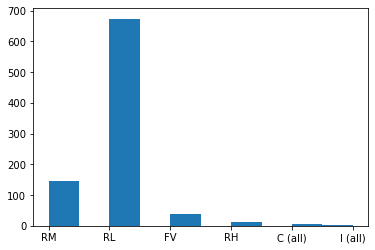

In [1742]:
plt.hist(train['MS Zoning'])

In [1743]:
MS_Zoning_dummy = pd.get_dummies(train['MS Zoning'])

In [1744]:
MS_Zoning_dummy.isnull().sum()

C (all)    0
FV         0
I (all)    0
RH         0
RL         0
RM         0
dtype: int64

In [1745]:
features = pd.concat([features, MS_Zoning_dummy], axis = 1)

## Lot Frontage

In [1746]:
train['Lot Frontage'];

(array([ 57.,  90., 221., 225.,  69.,  26.,  20.,   3.,   4.,   3.]),
 array([ 21. ,  37.1,  53.2,  69.3,  85.4, 101.5, 117.6, 133.7, 149.8,
        165.9, 182. ]),
 <BarContainer object of 10 artists>)

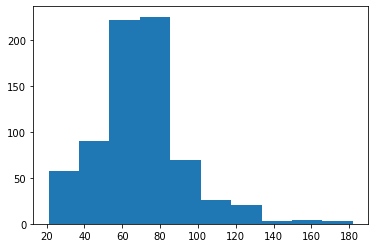

In [1747]:
plt.hist(train['Lot Frontage'])

In [1748]:
train['Lot Frontage'].replace({np.nan:0},inplace = True)

In [1749]:
train['Lot Frontage'].describe();

In [1750]:
features = pd.concat([features, train['Lot Frontage']], axis = 1)

In [1751]:
features;

## Lot Area

In [1752]:
train['Lot Area'].describe()

count       878.000000
mean      10307.033030
std       10002.674602
min        1477.000000
25%        7297.250000
50%        9446.000000
75%       11589.000000
max      215245.000000
Name: Lot Area, dtype: float64

(array([855.,  19.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  1477. ,  22853.8,  44230.6,  65607.4,  86984.2, 108361. ,
        129737.8, 151114.6, 172491.4, 193868.2, 215245. ]),
 <BarContainer object of 10 artists>)

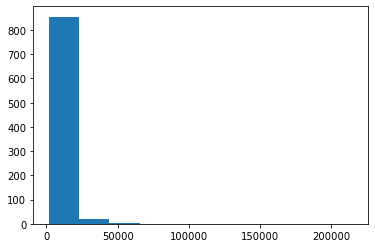

In [1753]:
plt.hist(train['Lot Area'])

In [1754]:
train.sort_values(by=['Lot Area']);

In [1755]:
train.loc[train['Id'] == 2116]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [1756]:
features = pd.concat([features, train['Lot Area']], axis = 1)

## Street

In [1757]:
train['Street'].describe()

count      878
unique       2
top       Pave
freq       873
Name: Street, dtype: object

In [1758]:
train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [1759]:
train['Street'].isnull().sum()

0

In [1760]:
Street_zoning = pd.get_dummies(train['Street'])

In [1761]:
features = pd.concat([features, Street_zoning], axis = 1)

## Alley

In [1762]:
train['Alley'].describe()

count       58
unique       2
top       Grvl
freq        35
Name: Alley, dtype: object

In [1763]:
train['Alley'].isnull().sum()

820

In [1764]:
Alley_dummy = pd.get_dummies(train['Alley'])

In [1765]:
Alley_dummy.rename(columns = {'NA':'No Alley', 'Grvl':'Grvl_Alley','Pave':'Pave_Alley'});

In [1766]:
features = pd.concat([features, Alley_dummy], axis = 1)

## Lot Shape

In [1767]:
train['Lot Shape'].isnull().sum()

0

In [1768]:
train['Lot Shape'].describe()

count     878
unique      4
top       Reg
freq      564
Name: Lot Shape, dtype: object

In [1769]:
Lot_Shape_dummy = pd.get_dummies(train['Lot Shape'])

In [1770]:
features = pd.concat([features, Lot_Shape_dummy], axis = 1)

## Land Contour

In [1771]:
train['Land Contour'].isnull().sum()

0

In [1772]:
Land_Contour_dummy = pd.get_dummies(train['Land Contour'])

In [1773]:
features = pd.concat([features, Land_Contour_dummy], axis =1)

## Utilities

In [1774]:
train['Utilities'].isnull().sum()

0

In [1775]:
Utilities_dummy = pd.get_dummies(train['Utilities'])

In [1776]:
features = pd.concat([features, Utilities_dummy], axis =1)

## Lot Config

In [1777]:
train['Lot Config'];

In [1778]:
train['Lot Config'].isnull().sum()

0

In [1779]:
Lot_Config_dummies = pd.get_dummies(train['Lot Config'])

In [1780]:
features = pd.concat([features, Lot_Config_dummies], axis =1)

## Land Slope

In [1781]:
train['Land Slope'].isnull().sum()

0

In [1782]:
Land_Slope_dummy = pd.get_dummies(train['Land Slope'])

In [1783]:
features = pd.concat([features, Land_Slope_dummy], axis =1)

## Neighborhood 

In [1784]:
train['Neighborhood'].isnull().sum()

0

In [1785]:
train['Neighborhood'].unique()

array(['OldTown', 'Sawyer', 'Gilbert', 'NAmes', 'MeadowV', 'CollgCr',
       'Somerst', 'Mitchel', 'SawyerW', 'IDOTRR', 'BrkSide', 'Edwards',
       'ClearCr', 'NWAmes', 'Timber', 'NoRidge', 'NridgHt', 'Crawfor',
       'StoneBr', 'Veenker', 'BrDale', 'SWISU', 'Blmngtn', 'NPkVill',
       'Greens', 'Blueste'], dtype=object)

In [1786]:
Neighborhood_dummy = pd.get_dummies(train['Neighborhood'])

In [1787]:
features = pd.concat([features, Neighborhood_dummy], axis =1)

## Condition 1

In [1788]:
train['Condition 1'].isnull().sum()

0

In [1789]:
train['Condition 1'].unique()

array(['Norm', 'Feedr', 'Artery', 'PosA', 'RRAn', 'RRNn', 'RRAe', 'RRNe',
       'PosN'], dtype=object)

In [1790]:
Condition_1_dummy = pd.get_dummies(train['Condition 1'])

In [1791]:
features = pd.concat([features,Condition_1_dummy],axis = 1)

## Condition 2

In [1792]:
train['Condition 2'].isnull().sum()

0

In [1793]:
Condition_2_dummy = pd.get_dummies(train['Condition 2'])

In [1794]:
features = pd.concat([features,Condition_2_dummy],axis = 1)

## Bldg Type

In [1795]:
train['Bldg Type'].isnull().sum()

0

In [1796]:
Bldg_Type_dummy = pd.get_dummies(train['Bldg Type'])

In [1797]:
features = pd.concat([features,Bldg_Type_dummy],axis = 1)

## House Style

In [1798]:
train['House Style'].isnull().sum()

0

In [1799]:
House_Style_Type_dummy = pd.get_dummies(train['House Style'])

In [1800]:
features = pd.concat([features,House_Style_Type_dummy],axis = 1)

## Overall Qual

In [1801]:
train['Overall Qual'].isnull().sum()

0

(array([  4.,  11.,  67., 262.,   0., 226., 171., 100.,  30.,   7.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

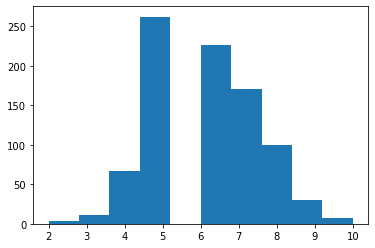

In [1802]:
plt.hist(train['Overall Qual'])

In [1803]:
train['Overall Qual'].unique()

array([ 6,  5,  7,  4,  8,  3,  9, 10,  2])

In [1804]:
#sns.scatterplot(data = train, x = 'Overall Qual', y = 'SalePrice')

In [1805]:
features = pd.concat([features,train['Overall Qual']],axis = 1)

## Overall Cond

In [1806]:
train['Overall Cond'].unique()

array([8, 4, 5, 6, 7, 9, 3, 2, 1])

In [1807]:
train['Overall Cond'].isnull().sum()

0

(array([  3.,   4.,  15.,  31.,   0., 485., 165., 120.,  43.,  12.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

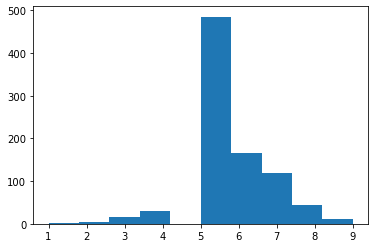

In [1808]:
plt.hist(train['Overall Cond'])

In [1809]:
#sns.scatterplot(data = train, x = 'Overall Cond', y = 'SalePrice')

<AxesSubplot:xlabel='Overall Cond', ylabel='Overall Qual'>

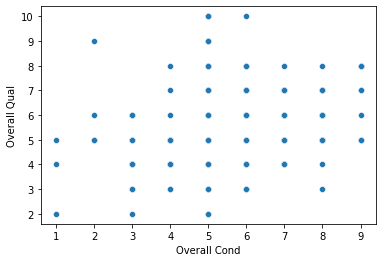

In [1810]:
sns.scatterplot(data = train, x = 'Overall Cond', y = 'Overall Qual')

In [1811]:
features = pd.concat([features,train['Overall Cond']],axis = 1)

## Year Built

In [1812]:
train['Year Built'].head()

0    1910
1    1977
2    2006
3    1923
4    1963
Name: Year Built, dtype: int64

(array([  7.,  12.,  39.,  72.,  34., 101., 152., 123.,  76., 262.]),
 array([1880., 1893., 1906., 1919., 1932., 1945., 1958., 1971., 1984.,
        1997., 2010.]),
 <BarContainer object of 10 artists>)

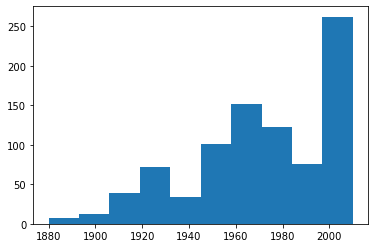

In [1813]:
plt.hist(train['Year Built'])

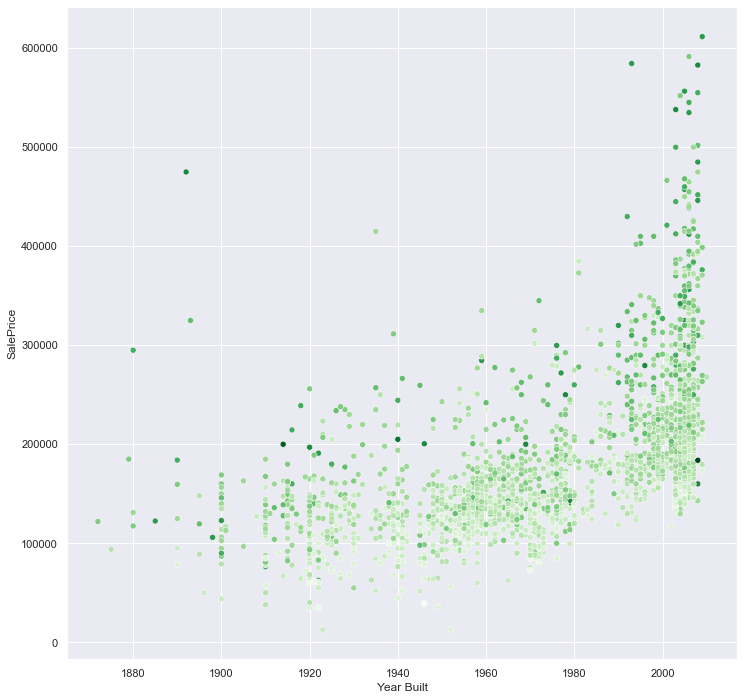

In [41]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(data = train, x = 'Year Built', y = 'SalePrice', hue = 'TotRms AbvGrd', palette='Greens', legend=False);

In [1815]:
features = pd.concat([features,train['Year Built']],axis = 1)

## Year Remod/Add

In [1816]:
train['Year Remod/Add'].isnull().sum()

0

(array([129.,  44.,  56.,  69.,  60.,  39.,  31.,  91., 145., 214.]),
 array([1950., 1956., 1962., 1968., 1974., 1980., 1986., 1992., 1998.,
        2004., 2010.]),
 <BarContainer object of 10 artists>)

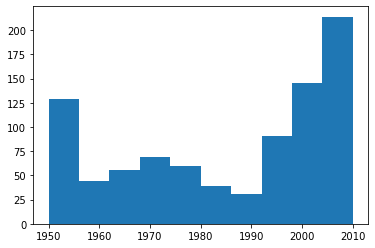

In [1817]:
plt.hist(train['Year Remod/Add'])

In [1818]:
features = pd.concat([features,train['Year Remod/Add']],axis = 1)

## Roof Style

In [1819]:
train['Roof Style'].isnull().sum()

0

In [1820]:
Roof_Style_Type_dummy = pd.get_dummies(train['Roof Style'])

In [1821]:
features = pd.concat([features,Roof_Style_Type_dummy],axis = 1)

## Roof Matl

In [1822]:
train['Roof Matl'].isnull().sum()

0

In [1823]:
Roof_Matl_dummy = pd.get_dummies(train['Roof Matl'])

In [1824]:
features = pd.concat([features,Roof_Matl_dummy],axis = 1)

## Exterior 1rst

In [1825]:
train['Exterior 1st'].isnull().sum()

0

In [1826]:
Exterior_1 = pd.get_dummies(train['Exterior 1st'])

In [1827]:
features = pd.concat([features, Exterior_1],axis = 1)

## Exterior 2nd

In [1828]:
train['Exterior 2nd'].isnull().sum()

0

In [1829]:
Exterior_2 = pd.get_dummies(train['Exterior 2nd'])

In [1830]:
features = pd.concat([features, Exterior_2],axis = 1)

## Mas Vnr Type

In [1831]:
train['Mas Vnr Type'].isnull().sum()

1

In [1832]:
Mas_Vnr_Type_dummy = pd.get_dummies(train['Mas Vnr Type'], dummy_na = True)

In [1833]:
Mas_Vnr_Type_dummy;

In [1834]:
features = pd.concat([features, Mas_Vnr_Type_dummy],axis = 1)

## Mas Vnr Area

In [1835]:
train['Mas Vnr Area'];

In [1836]:
train['Mas Vnr Area'].isnull().sum()

1

In [1837]:
train['Mas Vnr Area'].median()

0.0

In [1838]:
train['Mas Vnr Area'].replace({np.nan:train['Mas Vnr Area'].median()},inplace = True)

In [1839]:
train['Mas Vnr Area'].isnull().sum()

0

(array([625., 127.,  58.,  40.,  14.,   5.,   3.,   1.,   3.,   2.]),
 array([   0. ,  137.8,  275.6,  413.4,  551.2,  689. ,  826.8,  964.6,
        1102.4, 1240.2, 1378. ]),
 <BarContainer object of 10 artists>)

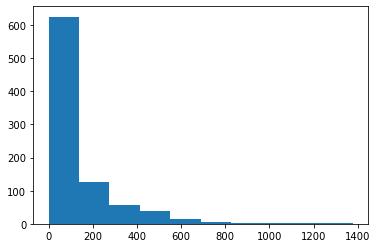

In [1840]:
plt.hist(train['Mas Vnr Area'])

In [1841]:
features = pd.concat([features, train['Mas Vnr Area']],axis = 1)

## Exter Qual

In [1842]:
train['Exter Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

(array([552.,   0.,   0., 292.,   0.,   0.,   9.,   0.,   0.,  25.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

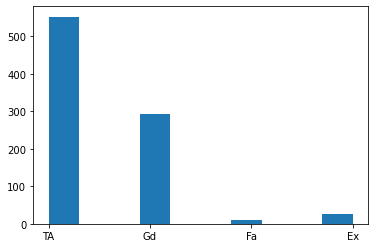

In [1843]:
plt.hist(train['Exter Qual'])

In [1844]:
train['Exter Qual'].isnull().sum()

0

In [1845]:
Extr_dummy = pd.get_dummies(train['Exter Qual'], dummy_na = True)

In [1846]:
features = pd.concat([features, Extr_dummy],axis = 1)

## Exter Cond

In [1847]:
train['Exter Cond'].isnull().sum()

0

In [1848]:
Exter_Cond_dummy = pd.get_dummies(train['Exter Cond'], dummy_na = True)

In [1849]:
features = pd.concat([features, Exter_Cond_dummy],axis = 1)

Foundation

In [1850]:
train['Foundation'].isnull().sum()

0

In [1851]:
Foundation_dummy = pd.get_dummies(train['Foundation'], dummy_na = True)

In [1852]:
features = pd.concat([features, Foundation_dummy],axis = 1)

## Bsmt Qual

In [1853]:
train['Bsmt Qual'].isnull().sum()

25

In [1854]:
Bst_qual_dummy = pd.get_dummies(train['Bsmt Qual'], dummy_na = True)

In [1855]:
features = pd.concat([features, Bst_qual_dummy],axis = 1)

## Bsmt Cond

In [1856]:
train['Bsmt Cond'].isnull().sum()

25

In [1857]:
Bst_cond_dummy = pd.get_dummies(train['Bsmt Cond'], dummy_na = True)

In [1858]:
features = pd.concat([features, Bst_cond_dummy],axis = 1)

## Bsmt Exposure

In [1859]:
train['Bsmt Exposure'].isnull().sum()

25

In [1860]:
Bst_Exposure_dummy = pd.get_dummies(train['Bsmt Exposure'], dummy_na = True)

In [1861]:
features = pd.concat([features, Bst_Exposure_dummy],axis = 1)

## BsmtFin Type 1

In [1862]:
train['BsmtFin Type 1'].isnull().sum()

25

In [1863]:
Bst_fin = pd.get_dummies(train['BsmtFin Type 1'], dummy_na = True)

In [1864]:
features = pd.concat([features, Bst_fin],axis = 1)

## Total Bsmt SF

In [1865]:
train['Total Bsmt SF'].isnull().sum()

0

In [1866]:
features = pd.concat([features, train['Total Bsmt SF']],axis = 1)

## Heating

In [1867]:
train['Heating'].isnull().sum()

0

In [1868]:
Heating_dummy = pd.get_dummies(train['Heating'], dummy_na = True)

In [1869]:
features = pd.concat([features, Heating_dummy],axis = 1)

## Heating QC

In [1870]:
train['Heating QC'].isnull().sum()

0

In [1871]:
HeatingQC_dummy = pd.get_dummies(train['Heating QC'], dummy_na = True)

In [1872]:
features = pd.concat([features, HeatingQC_dummy],axis = 1)

Central Air

In [1873]:
train['Central Air'].isnull().sum()

0

In [1874]:
Central_Air_dummy = pd.get_dummies(train['Central Air'], dummy_na = True)

In [1875]:
features = pd.concat([features, Central_Air_dummy],axis = 1)

## 1st Flr SF

In [1876]:
train['1st Flr SF'].isnull().sum()

0

(array([ 35., 171., 258., 170., 106.,  69.,  42.,  18.,   5.,   4.]),
 array([ 407. ,  633.7,  860.4, 1087.1, 1313.8, 1540.5, 1767.2, 1993.9,
        2220.6, 2447.3, 2674. ]),
 <BarContainer object of 10 artists>)

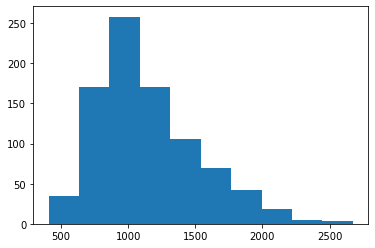

In [1877]:
plt.hist(train['1st Flr SF'])

In [1878]:
train.loc[train['1st Flr SF'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [1879]:
features = pd.concat([features, train['1st Flr SF']],axis = 1)

## 2ndt Flr SF

(array([493.,  25.,  75., 131.,  94.,  35.,  17.,   3.,   3.,   2.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <BarContainer object of 10 artists>)

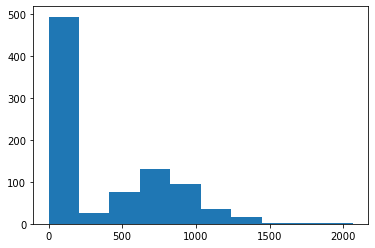

In [1880]:
plt.hist(train['2nd Flr SF'])

In [1881]:
train['2nd Flr SF'].isnull().sum()

0

In [1882]:
features = pd.concat([features, train['2nd Flr SF']],axis = 1)

Low Qual Fin SF

In [1883]:
train['Low Qual Fin SF'].isnull().sum()

0

In [1884]:
features = pd.concat([features, train['Low Qual Fin SF']],axis = 1)

## Living Areas

In [1885]:
train['Gr Liv Area'].isnull().sum()

0

(array([ 29., 259., 281., 194.,  73.,  32.,   6.,   2.,   0.,   2.]),
 array([ 407. ,  813.9, 1220.8, 1627.7, 2034.6, 2441.5, 2848.4, 3255.3,
        3662.2, 4069.1, 4476. ]),
 <BarContainer object of 10 artists>)

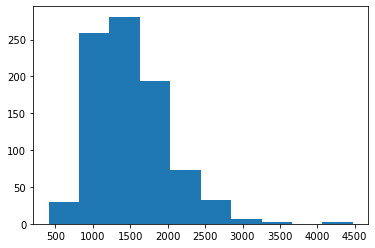

In [1886]:
plt.hist(train['Gr Liv Area'])

In [1887]:
train[['Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr']].isnull().sum()

Gr Liv Area       0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
dtype: int64

In [1888]:
train.loc[train['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [1889]:
features = pd.concat([features, train[['Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr']]],axis = 1)

## Kitchen Qual

In [1890]:
train['Kitchen Qual'].isnull().sum()

0

In [1891]:
Kitchen_qual_dummy = pd.get_dummies(train['Kitchen Qual'], dummy_na = True)

In [1892]:
features = pd.concat([features,Kitchen_qual_dummy],axis = 1)

## TotRms AbvGrd

In [1893]:
train['TotRms AbvGrd'].isnull().sum()

0

plt.hist(train['TotRms AbvGrd'])

In [1894]:
features = pd.concat([features,train['TotRms AbvGrd']],axis = 1)

## Functional 

In [1895]:
train['Functional'].isnull().sum()

0

In [1896]:
Functional_dummy = pd.get_dummies(train['Functional'], dummy_na = True)

In [1897]:
features = pd.concat([features,Functional_dummy],axis = 1)

## Fireplaces

In [1898]:
train['Fireplaces'].isnull().sum()

0

(array([422.,   0.,   0., 375.,   0.,   0.,  75.,   0.,   0.,   6.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

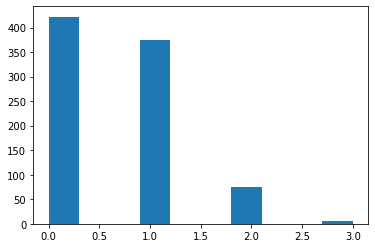

In [1899]:
plt.hist(train['Fireplaces'])

In [1900]:
features = pd.concat([features,train['Fireplaces']],axis = 1)

## Garage Type

In [1901]:
train['Garage Type'].isnull().sum()

44

In [1902]:
Garage_type_dummy = pd.get_dummies(train['Garage Type'], dummy_na = True)

In [1903]:
features = pd.concat([features,Garage_type_dummy],axis = 1)

## Garage Finish

In [1904]:
train['Garage Finish'].isnull().sum()

45

In [1905]:
train.loc[train['Garage Finish'].isnull() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
29,1904,534451020,50,RL,51.0,3500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144,Unf,0,226,370,GasA,TA,N,FuseA,442,228,0,670,1,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,21,0,0,0,0,NaN,MnPrv,Shed,2000,7,2007,WD
45,979,923228150,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD
66,2362,527403120,20,RL,0.0,8125,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,614,Unf,0,244,858,GasA,TA,Y,SBrkr,858,0,0,858,0,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD
68,2188,908226180,30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,3,6,1931,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,544,Unf,0,0,544,GasA,Ex,Y,SBrkr,774,0,0,774,0,0,1,0,3,1,Gd,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,286,0,0,0,NaN,NaN,NaN,0,5,2007,WD
105,1988,902207010,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,9,1945,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,329,Unf,0,357,686,GasA,Gd,Y,SBrkr,866,0,0,866,0,0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,58,42,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD
109,217,905101300,90,RL,72.0,10773,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,72.0,Fa,Fa,CBlock,TA,TA,No,ALQ,704,Unf,0,1128,1832,GasA,TA,N,SBrkr,1832,0,0,1832,2,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD
113,2908,923205120,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD
144,1507,908250040,50,RL,57.0,8050,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,8,1947,1993,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,929,208,0,1137,0,0,1,1,4,1,TA,8,Min1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD
152,1368,903476110,50,RM,60.0,5586,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,6,7,1920,1998,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,901,901,GasA,Gd,Y,SBrkr,1088,110,0,1198,0,0,1,0,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,98,0,0,0,0,NaN,MnPrv,NaN,0,9,2008,ConLD
156,332,923228270,160,RM,21.0,1900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Ex,Y,SBrkr,546,546,0,

In [1906]:
Garage_finish_dummy = pd.get_dummies(train['Garage Finish'], dummy_na = True)

In [1907]:
features = pd.concat([features,Garage_finish_dummy],axis = 1)

## Garage Cars

In [1908]:
train['Garage Cars'].isnull().sum()

0

(array([ 44.,   0., 254.,   0.,   0., 467.,   0., 110.,   0.,   3.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

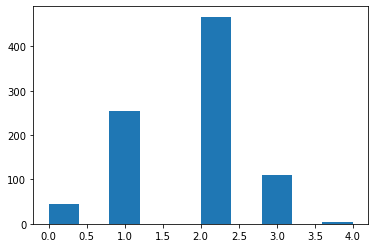

In [1909]:
plt.hist(train['Garage Cars'])

In [1910]:
features = pd.concat([features,train['Garage Cars']],axis = 1)

In [1911]:
features = pd.concat([features,train['Garage Area']],axis = 1)

## Garage Quality

In [1912]:
Garage_Qual_dummy = pd.get_dummies(train['Garage Qual'], dummy_na = True)

In [1913]:
features = pd.concat([features,Garage_Qual_dummy],axis = 1)

## Paved Drive

In [1914]:
train['Paved Drive'].isnull().sum()

0

In [1915]:
Driveway_dummy= pd.get_dummies(train['Paved Drive'], dummy_na = True)

In [1916]:
features = pd.concat([features,Driveway_dummy],axis = 1)

In [1917]:
train['Wood Deck SF'].isnull().sum()

0

## Porches

In [1918]:
features = pd.concat([features,train['Wood Deck SF']],axis = 1)

In [1919]:
features = pd.concat([features,train[['Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch','Pool Area']]],axis = 1)

## Fence

In [1920]:
train['Fence'].isnull().sum()

706

In [1921]:
Fence_dummy= pd.get_dummies(train['Fence'], dummy_na = True)

In [1922]:
features = pd.concat([features,Fence_dummy],axis = 1)

## Misc Feature

In [1923]:
Misc_dummy= pd.get_dummies(train['Misc Feature'], dummy_na = True)

In [1924]:
features = pd.concat([features,Misc_dummy],axis = 1)

## Misc Value

In [1925]:
features = pd.concat([features,train['Misc Val']],axis = 1)

## Date

In [1926]:
features = pd.concat([features,train[['Mo Sold','Yr Sold']]],axis = 1)

In [1927]:
Sale_Type_dummy= pd.get_dummies(train['Sale Type'], dummy_na = True)

In [1928]:
features = pd.concat([features,Sale_Type_dummy],axis = 1)

In [1929]:
features.isnull().sum();

In [1930]:
features.head()

,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190,C (all),FV,I (all),RH,RL,RM,Lot Frontage,Lot Area,Grvl,Pave,Grvl,Pave,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSewr,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Feedr,Norm,PosA,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Flat,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsbShng,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,PreCast,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,CBlock,None,Stone,NaN,Mas Vnr Area,Ex,Fa,Gd,TA,NaN,Ex,Fa,Gd,Po,TA,NaN,BrkTil,CBlock,PConc,Slab,Stone,Wood,NaN,Ex,Fa,Gd,Po,TA,NaN,Fa,Gd,TA,NaN,Av,Gd,Mn,No,NaN,ALQ,BLQ,GLQ,LwQ,Rec,Unf,NaN,Total Bsmt SF,Floor,GasA,GasW,Grav,NaN,Ex,Fa,Gd,TA,NaN,N,Y,NaN,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Ex,Fa,Gd,Po,TA,NaN,TotRms AbvGrd,Maj1,Maj2,Min1,Min2,Mod,Typ,NaN,Fireplaces,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NaN,Fin,RFn,Unf,NaN,Garage Cars,Garage Area,Fa,Gd,Po,TA,NaN,N,P,Y,NaN,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,GdPrv,GdWo,MnPrv,MnWw,NaN,Gar2,Othr,Shed,NaN,Misc Val,Mo Sold,Yr Sold,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,69.0,9142,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,6,8,1910,1950,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1020,0,1,0,0,0,0,0,1,0,0,1,0,0,908,1020,0,1928,0,0,2,0,4,2,0,1,0,0,0,0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,440,0,0,1,0,0,0,0,1,0,0,60,112,0,0,0,0,0,0,0,1,0,0,0,1,0,4,2006,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0,9662,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,5,4,1977,1977,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1967,0,1,0,0,0,0,0,0,1,0,0,1,0,1967,0,0,1967,0,0,2,0,6,2,0,0,0,0,1,0,10,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2,580,0,0,0,1,0,0,0,1,0,170,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,8,2006,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.0,17104,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7,5,2006,2006,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,654,0,1,0,0,0,1,0,0,0,0,0,1,0,664,832,0,1496,1,0,2,1,3,1,0,0,1,0,0,0,7,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2,426,0,0,0,1,0,0,0,1,0,100,24,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9,2006,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60.0,8520,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,5,6,1923,2006,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,968,0,1,0,0,0,0,0,0,1,0,0,1,0,968,0,0,968,0,0,1,0,2,1,0,0,0,0,1,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,480,1,0,0,0,0,1,0,0,0,0,0,184,0,0,0,0,0

In [2099]:
features.isnull().sum();

In [1932]:
features.fillna(0,inplace =True);

In [2098]:
features.isnull().sum();

In [1726]:
#features_train = features

In [1935]:
features_test = features

In [1161]:
features_train.head()

,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190,A (agr),C (all),FV,I (all),RH,RL,RM,Lot Frontage,Lot Area,Grvl,Pave,Grvl,Pave,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa,NoSewr,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Flat,Gable,Gambrel,Hip,Mansard,Shed,ClyTile,CompShg,Membran,Tar&Grv,WdShake,WdShngl,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,NaN,Mas Vnr Area,Ex,Fa,Gd,TA,NaN,Ex,Fa,Gd,Po,TA,NaN,BrkTil,CBlock,PConc,Slab,Stone,Wood,NaN,Ex,Fa,Gd,Po,TA,NaN,Ex,Fa,Gd,Po,TA,NaN,Av,Gd,Mn,No,NaN,ALQ,BLQ,GLQ,LwQ,Rec,Unf,NaN,Total Bsmt SF,GasA,GasW,Grav,OthW,Wall,NaN,Ex,Fa,Gd,Po,TA,NaN,N,Y,NaN,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Ex,Fa,Gd,TA,NaN,TotRms AbvGrd,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,NaN,Fireplaces,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NaN,Fin,RFn,Unf,NaN,Garage Cars,Garage Area,Ex,Fa,Gd,Po,TA,NaN,N,P,Y,NaN,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,GdPrv,GdWo,MnPrv,MnWw,NaN,Elev,Gar2,Othr,Shed,TenC,NaN,Misc Val,Mo Sold,Yr Sold,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,NaN
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,13517,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,8,1976,2005,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,289.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,725.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,725,754,0,1479,0.0,0.0,2,1,3,1,0,0,1,0,0,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,2.0,475.0,0,0,0,0,1,0,0,0,1,0,0,44,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,3,2010,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,43.0,11492,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7,5,1996,1997,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,132.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,913.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,913,1209,0,2122,1.0,0.0,2,1,4,1,0,0,1,0,0,8,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2.0,559.0,0,0,0,0,1,0,0,0,1,0,0,74,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,2009,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,68.0,7922,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,5,7,1953,2007,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1057.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1057,0,0,1057,1.0,0.0,1,0,3,1,0,0,1,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1.0,246.0,0,0,0,0,1,0,0,0,1,0,0,52,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2010,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,73.0,9802,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,5,2006,2007,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [1162]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1163]:
features_train = features_train.T.drop_duplicates().T # Credit to Kite.com 

In [1241]:
features_test = features_test.T.drop_duplicates().T # Credit to Kite.com 

In [1296]:
features_train.dropna(axis=1);

In [1297]:
features_test.dropna(axis=1);

In [2001]:
#Test Drop
features_test.drop(features_test.columns[240], axis=1, inplace = True);

In [1937]:
#Train Drop
#features_train.drop(features_train.columns[], axis=1, inplace = True);

In [1938]:
features_test.insert(12, 150, np.nan, True)

In [1940]:
features_test.insert(17, 'C(all)', np.nan, True)

In [1944]:
features_test.insert(58, 'GrnHill', np.nan, True)

In [1942]:
features_test.insert(38, 'NoSeWa', np.nan, True)

In [1946]:
features_test.insert(60, 'Landmrk', np.nan, True)

In [1948]:
features_test.insert(85, 'Artery', np.nan, True)

In [1950]:
features_test.insert(89, 'PosN', np.nan, True)

In [1952]:
features_test.insert(90, 'PRAn', np.nan, True)

In [1954]:
features_test.insert(91, 'PRAe', np.nan, True)

In [1956]:
features_test.insert(92, 'PRAn', np.nan, True)

In [1958]:
features_test.insert(116, 'ClyTile', np.nan, True)

In [1962]:
features_test.insert(126, 'CemntNd', np.nan, True)

In [1964]:
features_test.insert(129, 'ImStucc', np.nan, True)

In [1970]:
features_test.insert(141, 'CBlock', np.nan, True)

In [1972]:
features_test.insert(170, 'CBlock', np.nan, True)

In [1974]:
features_test.insert(182, 'Fa', np.nan, True)

In [1977]:
features_test.insert(185, 'Po', np.nan, True)

In [1981]:
features_test.insert(204, 'OthW', np.nan, True)

In [1983]:
features_test.insert(205, 'Wall', np.nan, True)

In [1985]:
features_test.insert(210, 'Po', np.nan, True)

In [1989]:
features_test.insert(166, 'Po', np.nan, True)

In [1991]:
features_test.insert(179, 'Po', np.nan, True)

In [1993]:
features_test.insert(185, 'Po', np.nan, True)

In [1995]:
features_test.insert(210, 'Po', np.nan, True)

In [1997]:
features_test.insert(237, 'Sal', np.nan, True)

In [1998]:
features_test.insert(238, 'Sev', np.nan, True)

In [2002]:
features_test.insert(239, 'Typ', np.nan, True)

In [2004]:
features_test.insert(255, 'Ex', np.nan, True)

In [2010]:
features_test.insert(259, 'Po', np.nan, True)

In [2008]:
features_train.insert(255, 'Po', np.nan, True)

In [2014]:
features_test.insert(277, 'Elev', np.nan, True)

In [2016]:
features_test.insert(278, 'Elev', np.nan, True)

In [2018]:
features_test.insert(282, 'Ten C', np.nan, True)

In [2020]:
features_train.insert(295, 'VWD', np.nan, True)

In [2064]:
pd.concat([pd.DataFrame(features_test.columns),pd.DataFrame(features_train.columns)],axis = 1, keys = ['Test','Train']);

In [916]:
features_train.columns

Index([     20,      30,      40,      45,      50,      60,      70,      75,
            80,      85,
       ...
         'COD',   'CWD',   'Con', 'ConLD', 'ConLI', 'ConLw',   'New',   'Oth',
         'WD ',     nan],
      dtype='object', length=295)

In [2023]:
features_test.fillna(0,inplace =True);

In [2022]:
features_train.fillna(0,inplace =True);

# Modeling 

In [2027]:
X = features_train
y = train[['SalePrice']]

In [2028]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [2029]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 298 entries, 20 to nan
dtypes: float64(33), int64(29), uint8(236)
memory usage: 627.8 KB


In [2030]:
np.shape(X)

(2051, 298)

In [2031]:
np.shape(train[['SalePrice']])

(2051, 1)

In [2032]:
np.shape(X_train)

(1538, 298)

In [2033]:
np.shape(X_test)

(513, 298)

In [2034]:
np.shape(y_train)

(1538, 1)

In [2035]:
np.shape(y_test)

(513, 1)

In [2036]:
X_test.head()

,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190,A (agr),C (all),FV,I (all),RH,RL,RM,Lot Frontage,Lot Area,Grvl,Pave,Grvl,Pave,IR1,IR2,IR3,Reg,Bnk,HLS,Low,Lvl,AllPub,NoSeWa,NoSewr,Corner,CulDSac,FR2,FR3,Inside,Gtl,Mod,Sev,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Flat,Gable,Gambrel,Hip,Mansard,Shed,ClyTile,CompShg,Membran,Tar&Grv,WdShake,WdShngl,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,NaN,Mas Vnr Area,Ex,Fa,Gd,TA,NaN,Ex,Fa,Gd,Po,TA,NaN,BrkTil,CBlock,PConc,Slab,Stone,Wood,NaN,Ex,Fa,Gd,Po,TA,NaN,Ex,Fa,Gd,Po,TA,NaN,Av,Gd,Mn,No,NaN,ALQ,BLQ,GLQ,LwQ,Rec,Unf,NaN,Total Bsmt SF,GasA,GasW,Grav,OthW,Wall,NaN,Ex,Fa,Gd,Po,TA,NaN,N,Y,NaN,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Ex,Fa,Gd,TA,NaN,TotRms AbvGrd,Maj1,Maj2,Min1,Min2,Mod,Sal,Sev,Typ,NaN,Fireplaces,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NaN,Fin,RFn,Unf,NaN,Garage Cars,Garage Area,Po,Ex,Fa,Gd,Po,TA,NaN,N,P,Y,NaN,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,GdPrv,GdWo,MnPrv,MnWw,NaN,Elev,Elev,Gar2,Othr,Shed,TenC,NaN,Misc Val,Mo Sold,Yr Sold,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,NaN
1124,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,55.0,10780,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,5,5,1976,1976,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,911.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,954,0,0,954,0.0,0.0,1,0,3,1,0,0,0,1,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2.0,576.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,1,0,7,2006,0,0,0,0,0,0,0,0,0.0,1,0
188,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,88.0,14200,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,7,6,1966,1966,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,309.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,924.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1216,941,0,2157,0.0,0.0,2,1,4,1,0,0,1,0,0,8,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0,1,0,0,0,2.0,487.0,0.0,0,0,0,0,1,0,0,0,1,0,105,66,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,1,0,5,2006,0,0,0,0,0,0,0,0,0.0,1,0
1727,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,74.0,8899,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,8,5,2007,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,108.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,948.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,948,1140,0,2088,0.0,0.0,2,1,4,1,0,0,1,0,0,10,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,3.0,656.0,0.0,0,0,0,0,1,0,0,0,1,0,100,24,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,1,0,6,2008,0,0,0,0,0,0,0,0,0.0,1,0
1658,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,66.0,6858,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6,4,1915,1950,0,1,0,0,0,0,0,1,0,0,0

In [2037]:
sc = StandardScaler()

In [2038]:
Z_train = sc.fit_transform(X_train)

In [2039]:
Z_test = sc.transform(X_test)

## Lasso 

In [2040]:
alpha_1 = np.logspace(-3,3,100)

In [2041]:
lasso_cv = LassoCV(alphas = alpha_1, cv = 5)

In [2101]:
lasso_cv.fit(Z_train,y_train);

/Users/tabchapman/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [2043]:
lasso_cv.score(Z_train,y_train)

0.9312533882843198

In [2044]:
lasso_cv.score(Z_test,y_test)

0.9240508045250058

In [2045]:
train_preds = lasso_cv.predict(Z_train)
test_preds = lasso_cv.predict(Z_test)

In [2046]:
print(train_preds)

[185361.7630542  221239.17178483 133713.99130393 ... 167037.96594193
  96430.80529247 214614.34999937]


In [2047]:
(mean_squared_error(y_true = y_train, y_pred = train_preds) ) ** 0.5

20851.602727748075

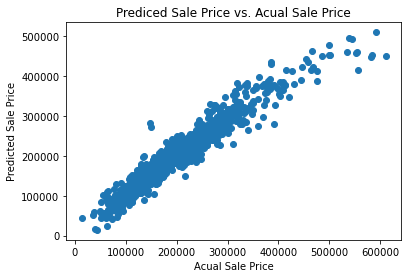

In [2117]:
plt.scatter(x = y_train, y = train_preds)
plt.title('Prediced Sale Price vs. Acual Sale Price')
plt.xlabel('Acual Sale Price')
plt.ylabel('Predicted Sale Price');

In [2049]:
Z_features = sc.fit_transform(features)

In [2114]:
predic = pd.DataFrame(lasso_cv.predict(Z_features))

In [2121]:
resids = (y_train - predic)

In [2053]:
#turn_in_1 = train1[['Id','SalePrice']]

In [ ]:
# First attempt as making a new cvs datset

In [2054]:
#turn_in_1.to_csv('datasets/submissions/first_model.csv', index =False)

In [2056]:
#turn_in_1.info()

## Test

In [2057]:
Z_features_test = sc.fit_transform(features_test)

In [2058]:
Z_features_test

array([[-0.73692469, -0.21269249, -0.04778185, ..., -0.0337676 ,
         0.40362595,  0.        ],
       [-0.73692469, -0.21269249, -0.04778185, ..., -0.0337676 ,
         0.40362595,  0.        ],
       [-0.73692469, -0.21269249, -0.04778185, ..., -0.0337676 ,
        -2.4775414 ,  0.        ],
       ...,
       [ 1.35699077, -0.21269249, -0.04778185, ..., -0.0337676 ,
         0.40362595,  0.        ],
       [ 1.35699077, -0.21269249, -0.04778185, ..., -0.0337676 ,
         0.40362595,  0.        ],
       [ 1.35699077, -0.21269249, -0.04778185, ..., -0.0337676 ,
         0.40362595,  0.        ]])

In [2059]:
predic_test = lasso_cv.predict(Z_features_test)

In [2076]:
turn_in = pd.DataFrame(test[['Id']])

In [2077]:
turn_in['SalePrice'] = predic_test

In [2078]:
turn_in.head()

,Id,SalePrice
0,2658,146422.790675
1,2718,171916.444409
2,2414,212935.794719
3,1989,112279.415267
4,625,184119.997037


In [2079]:
turn_in.to_csv('datasets/submissions/model.csv', index =False)


## Stuff for presenatation

In [2104]:
train.groupby(['Yr Sold']).mean()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,SalePrice
Yr Sold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,2623.454338,7.127895e+08,60.901826,67.908847,10096.945205,6.066210,5.431507,1970.598174,1981.118721,96.184332,417.568493,47.746575,569.123288,1034.438356,1144.906393,335.242009,5.851598,1486.000000,0.422374,0.066210,1.550228,0.351598,2.831050,1.036530,6.438356,0.566210,1977.014599,1.755708,463.210046,98.372146,46.808219,26.130137,2.194064,18.509132,6.175799,31.769406,6.538813,179471.609589
2007,1952.371486,7.059421e+08,53.594378,70.123786,10611.178715,6.158635,5.556225,1973.538153,1985.594378,104.755102,417.301205,48.385542,628.997992,1094.684739,1193.429719,322.014056,4.724900,1520.168675,0.389558,0.060241,1.588353,0.387550,2.879518,1.032129,6.487952,0.624498,1980.920335,1.826962,490.505030,92.730924,49.188755,20.263052,0.815261,17.130522,2.323293,65.421687,6.371486,185524.514056
2008,1296.668966,7.269699e+08,61.413793,68.698895,9904.135632,6.170115,5.668966,1970.912644,1984.857471,109.897436,467.230415,48.619816,535.428571,1051.278802,1157.655172,348.882759,4.650575,1511.188506,0.431871,0.069284,1.583908,0.386207,2.836782,1.057471,6.448276,0.554023,1978.882793,1.737931,463.464368,87.027586,52.579310,22.110345,4.280460,13.965517,2.427586,49.310345,6.324138,181750.372414
2009,668.710762,7.066083e+08,53.049327,69.501340,9623.500000,6.123318,5.569507,1972.145740,1984.827354,96.611738,469.073991,46.091928,537.056054,1052.221973,1175.558296,323.049327,8.107623,1506.715247,0.455157,0.067265,1.609865,0.356502,2.843049,1.049327,6.434978,0.621076,1978.292740,1.811659,483.076233,93.683857,45.656951,19.486547,3.852018,17.654709,0.000000,27.690583,6.697309,182455.244395
2010,169.200855,7.197988e+08,56.346154,68.805970,9985.183761,5.970085,5.606838,1970.542735,1984.495726,82.678112,444.529915,49.782051,553.089744,1047.401709,1131.149573,309.448718,3.213675,1443.811966,0.457265,0.047009,1.529915,0.371795,2.803419,1.038462,6.299145,0.576923,1977.565611,1.713675,458.551282,100.623932,39.769231,27.564103,1.572650,14.008547,0.000000,108.905983,4.196581,174180.059829


In [2110]:
train.groupby(['Condition 1']).corr();